<a href="https://colab.research.google.com/github/AdamaTG/Atelier-Regression-Lineaire/blob/main/INF6243_TP2_RL_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Régression linéaire multiple
***

* Le modèle prend la forme $$ Y = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + ... + \beta_{k}X_{k} $$ 

where:

$X_k$: variables prédictives

$Y$: variable dépendante

$\beta_0$: l'ordonnée à l'origine (inteecept)

$\beta_k$: les coefficients de pente pour chaque variable explicative (slope en anglais)


## **Import libraries**

In [ ]:

## Basic libs
import pandas as pd
import numpy as np
import seaborn as sns
import itertools

## Building Model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

## Data Visualization
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the dataset**

In [ ]:
datafiledir = "/content/drive/MyDrive/TP-INF6243/concrete_data.csv"

dataset = pd.read_csv(datafiledir)


In [ ]:
# Get the predictors
predictors_names =  list(dataset[['cement','blast_furnace_slag']].columns) # predictors_names ' '.join(map(str, X.columns))
predictors_names

['cement', 'blast_furnace_slag']

In [ ]:
# Get the predictors and target variables (Dependent & Independent Variables)
X = dataset.iloc[:, :2].values  # dataset.iloc[:, :4].values ['R&D Spend','Administration']
y = dataset.iloc[:, -1].values


In [ ]:
print(X.shape , "\n \n ", X)

#print(X)

(1030, 2) 
 
  [[540.    0. ]
 [540.    0. ]
 [332.5 142.5]
 ...
 [148.5 139.4]
 [159.1 186.7]
 [260.9 100.5]]


## **Splitting the dataset into the Training set and Test set**

In [ ]:
X_train = pd.read_csv('./sample_data/california_housing_train.csv')
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
#base d'apprentissage et base de test
#train: 70%, test: 30%
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(927, 2)
(927,)
(103, 2)
(103,)


## **Training the Multiple Linear Regression model**

In [ ]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# create linear regression object 
modelLR = LinearRegression()


# onehotencoding onehotencoder
# fit linear regression
modelLR.fit(X_train, y_train)

LinearRegression()

## **Evaluation of the model**

In [ ]:
# model evaluation for training set
print('La performance du modèle sur la base de training')
y_predtrain = modelLR.predict(X_train )
mse_train =   ((mean_squared_error(y_train, y_predtrain)))
print("L'erreur du training est {}\n".format(mse_train))

# model evaluation for testing set
print('La performance du modèle sur la base de test')
y_pred = modelLR.predict(X_test)
mse_test = ((mean_squared_error(y_test, y_pred)))
print("L'erreur du Testing est {}".format(mse_test))

La performance du modèle sur la base de training
L'erreur du training est 187.72887079019574

La performance du modèle sur la base de test
L'erreur du Testing est 185.38282285773622


### The coefficients

In [ ]:
# The coefficients
print('B0:', modelLR.intercept_)
print('Bk:', modelLR.coef_)

B0: 5.016392340837836
Bk: [0.09452465 0.0558114 ]


In [ ]:
# get the slope and intercept of the line best fit.
b = np.hstack([modelLR.intercept_, modelLR.coef_])
b

array([5.01639234, 0.09452465, 0.0558114 ])

In [ ]:
# add X0 at the begining of  the  predictors lists
predictors_names.insert(0, "X0") # predictors_names.append("X0") 

predictors_names

['X0', 'cement', 'blast_furnace_slag']

In [ ]:
# Create the pandas DataFrame
df = pd.DataFrame(zip(predictors_names,b), index=["B0", "B1","B2"], columns = ['features', 'Coefficients'])
 
# print dataframe.
df

,features,Coefficients
B0,X0,5.016392
B1,cement,0.094525
B2,blast_furnace_slag,0.055811


# **Visualisation of the results**

In [ ]:
# function to visualize the data and the model
def plot_LR(X,y, ax, b):
  ######################## Prepare model data point for visualization ############################### 
  x1fit = np.arange(X[:,0].min(),X[:,0].max() +1)
  x2fit = np.arange(X[:,1].min(),X[:,1].max() +1)
  X1FIT,X2FIT = np.meshgrid(x1fit,x2fit)
  
  YFIT = b[0] + b[1]*X1FIT + b[2]*X2FIT 

  ax.plot(X[:,0], X[:,1], y, color='r', zorder=15, linestyle='none', marker='o', alpha=0.5)
  ax.plot(X1FIT.flatten(), X2FIT.flatten(), YFIT.flatten(), color='#95d0fc', zorder=15, linestyle='none', marker='o', alpha=0.15)
  ax.set_xlabel("Cement", fontsize=12) 
  ax.set_ylabel("blast_furnace_slag", fontsize=12)
  ax.set_zlabel("CC_Strength", fontsize=12)
  return ax


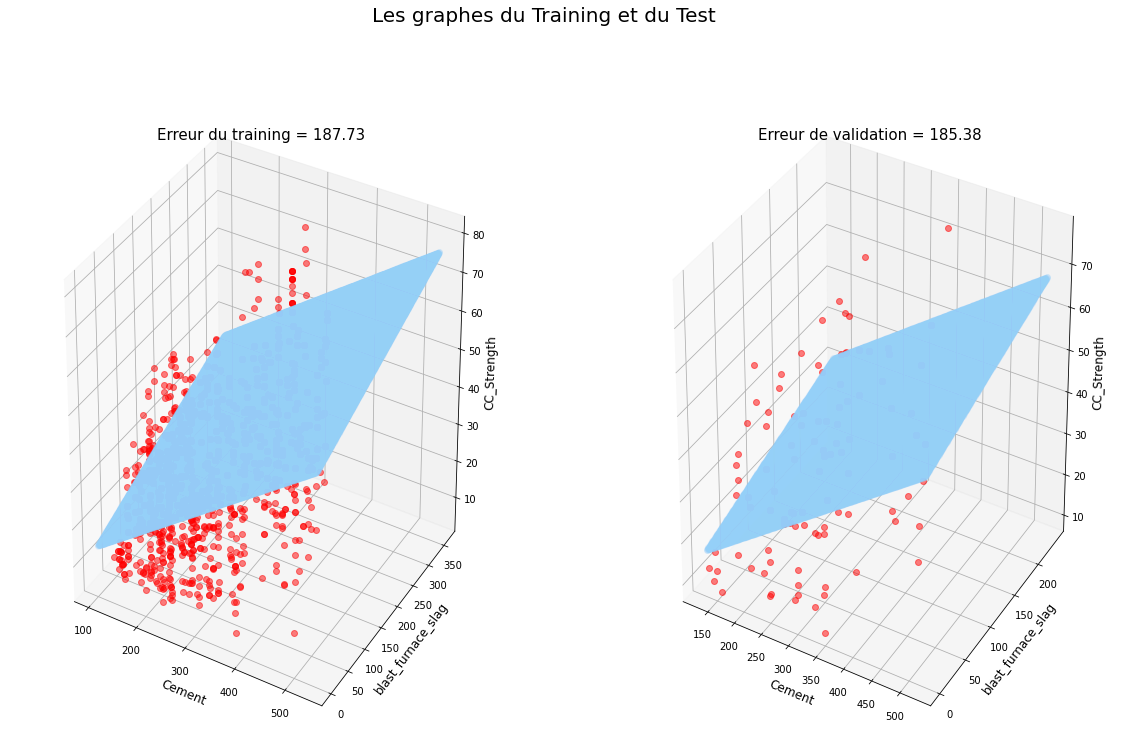

In [ ]:
fig = plt.figure(figsize=(20, 12)) 
#plt.style.use('seaborn-whitegrid')
# Visualising the Training set results
ax = fig.add_subplot(1, 2, 1, projection="3d")
ax = plot_LR(X_train, y_train, ax,b)
ax.set_title("Erreur du training = %.2f" % mse_train, fontsize=15);
#ax.view_init(50, 150)

# Visualising the Test set results
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax = plot_LR(X_test, y_test,ax, b)
ax.set_title('Erreur de validation = %.2f' % mse_test, fontsize=15);
#ax.view_init(50, 10)

fig.suptitle("Les graphes du Training et du Test ", fontsize=20);
